In [151]:
import numpy as np
import pickle as pkl
import seaborn as sns;
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
%matplotlib inline

In [152]:
import numpy as np
import seaborn as sns;
import q_learn as ql
reload(ql)
import robbery as rb
reload(rb)

<module 'robbery' from 'robbery.pyc'>

In [153]:
# del q1, q2, q3, q4, game 
q1 = ql.Agent('p1')
q2 = ql.Agent('p2')
q3 = ql.Agent('p3')
q4 = ql.Agent('p4')

game = rb.Robbery('test', [1,1,1,1], q1,q2,q3,q4)


In [154]:
for i in ql.Agent.get_agents():
    with open('./deterministic/'+i.str+'_table_1M_FOURS(1111)_alpha1.txt', 'rb') as f:
        dat=pkl.load(f)
        i.Q = dat['Q']
        i.wins = dat['games_won']
        i.games_played = dat['games_played']

In [120]:
q1.summary_actions()

{(0, 4, 3, 3): {(2, 1, -1, 1): -6.0},
 (1, 2, 4, 3): {(1, 1, 1, 1): -6.0},
 (1, 4, 2, 3): {(1, 1, 1, 1): -6.0},
 (1, 4, 3, 3): {(2, 1, -1, 1): -6.0},
 (1, 4, 4, 1): {(2, 1, -1, 1): -6.0},
 (3, 1, 4, 3): {(2, 1, 1, -1): 3.0},
 (3, 2, 2, 3): {(2, 1, -1, 1): 6.0},
 (3, 2, 4, 1): {(2, 1, 1, -1): 3.0},
 (3, 3, 3, 3): {(2, 1, -1, 1): 6.0},
 (3, 3, 4, 1): {(2, -1, 1, 1): 3.0},
 (3, 4, 1, 3): {(2, 1, 1, -1): 3.0},
 (3, 4, 2, 1): {(1, 1, 1, 1): -6.0},
 (3, 4, 3, 0): {(1, 1, 1, 0): -6.0},
 (3, 4, 3, 1): {(2, 1, 1, -1): 3.0},
 (4, 2, 3, 4): {(2, 1, -1, 1): 6.0},
 (4, 3, 3, 3): {(2, 1, -1, 1): 6.0},
 (4, 3, 3, 4): {(1, 1, 1, 1): 3.0},
 (4, 3, 4, 3): {(2, 1, -1, 1): 6.0},
 (4, 4, 3, 3): {(2, 1, 1, -1): 6.0},
 (4, 4, 4, 4): {(2, -1, 1, 1): 6.0}}

In [121]:
q2.summary_actions()

{(0, 3, 4, 3): {(0, 1, 1, 1): -6.0},
 (1, 1, 4, 4): {(1, 2, 1, -1): -6.0},
 (1, 3, 2, 4): {(-1, 2, 1, 1): 3.0},
 (1, 3, 3, 4): {(1, 2, -1, 1): 3.0},
 (1, 3, 4, 2): {(1, 1, 1, 1): -6.0},
 (1, 3, 4, 3): {(-1, 2, 1, 1): 3.0},
 (3, 0, 4, 3): {(1, 2, 1, -1): -6.0},
 (3, 1, 2, 4): {(1, 1, 1, 1): -6.0},
 (3, 1, 4, 2): {(1, 1, 1, 1): -6.0},
 (3, 1, 4, 3): {(1, 2, 1, -1): -6.0},
 (3, 3, 1, 4): {(-1, 2, 1, 1): 3.0},
 (3, 3, 2, 2): {(1, 2, 1, -1): 6.0},
 (3, 3, 3, 3): {(1, 2, 1, -1): 6.0},
 (3, 3, 4, 1): {(-1, 2, 1, 1): 3.0},
 (3, 4, 3, 3): {(1, 2, 1, -1): 6.0},
 (3, 4, 3, 4): {(1, 2, 1, -1): 6.0},
 (3, 4, 4, 3): {(-1, 2, 1, 1): 6.0},
 (4, 4, 2, 3): {(1, 2, 1, -1): 6.0},
 (4, 4, 3, 3): {(1, 1, 1, 1): 3.0},
 (4, 4, 4, 4): {(1, 2, -1, 1): 6.0}}

In [122]:
q3.summary_actions()

{(1, 3, 3, 4): {(1, -1, 2, 1): 3.0},
 (2, 1, 3, 4): {(1, 1, 1, 1): -6.0},
 (2, 3, 1, 4): {(1, 1, 1, 1): -6.0},
 (2, 3, 3, 2): {(-1, 1, 2, 1): 6.0},
 (3, 0, 3, 4): {(1, 0, 1, 1): -6.0},
 (3, 1, 3, 4): {(1, -1, 2, 1): 3.0},
 (3, 3, 0, 4): {(-1, 1, 2, 1): -6.0},
 (3, 3, 1, 4): {(-1, 1, 2, 1): -6.0},
 (3, 3, 3, 3): {(-1, 1, 2, 1): 6.0},
 (3, 3, 4, 3): {(-1, 1, 2, 1): 6.0},
 (3, 3, 4, 4): {(1, -1, 2, 1): 6.0},
 (3, 4, 4, 2): {(-1, 1, 2, 1): 6.0},
 (3, 4, 4, 3): {(1, 1, 1, 1): 3.0},
 (4, 1, 1, 4): {(-1, 1, 2, 1): -6.0},
 (4, 1, 3, 2): {(1, -1, 2, 1): 3.0},
 (4, 1, 3, 3): {(1, 1, 2, -1): 3.0},
 (4, 3, 1, 2): {(1, 1, 1, 1): -6.0},
 (4, 3, 3, 1): {(1, -1, 2, 1): 3.0},
 (4, 3, 4, 3): {(-1, 1, 2, 1): 6.0},
 (4, 4, 4, 4): {(1, 1, 2, -1): 6.0}}

In [123]:
q4.summary_actions()

{(1, 4, 3, 3): {(1, 1, -1, 2): 3.0},
 (2, 2, 3, 3): {(1, -1, 1, 2): 6.0},
 (2, 3, 4, 4): {(1, -1, 1, 2): 6.0},
 (2, 4, 1, 3): {(1, 1, -1, 2): 3.0},
 (2, 4, 3, 1): {(1, 1, 1, 1): -6.0},
 (3, 3, 3, 3): {(1, -1, 1, 2): 6.0},
 (3, 3, 3, 4): {(1, -1, 1, 2): 6.0},
 (3, 3, 4, 4): {(1, 1, 1, 1): 3.0},
 (3, 4, 1, 3): {(-1, 1, 1, 2): 3.0},
 (3, 4, 3, 4): {(1, -1, 1, 2): 6.0},
 (4, 1, 3, 3): {(1, 1, -1, 2): 3.0},
 (4, 2, 1, 3): {(1, 1, 1, 1): -6.0},
 (4, 2, 3, 1): {(1, 1, 1, 1): -6.0},
 (4, 3, 0, 3): {(1, 1, 0, 1): -6.0},
 (4, 3, 1, 3): {(1, 1, -1, 2): 3.0},
 (4, 3, 3, 0): {(1, -1, 1, 2): -6.0},
 (4, 3, 3, 1): {(1, -1, 1, 2): -6.0},
 (4, 3, 3, 4): {(1, 1, -1, 2): 6.0},
 (4, 4, 1, 1): {(1, -1, 1, 2): -6.0},
 (4, 4, 4, 4): {(-1, 1, 1, 2): 6.0}}

In [18]:
valids1 = game.valid_moves(1)
valids1[np.random.choice(valids1.shape[0])]+game.state

array([-1,  1,  0,  0])

In [19]:
valids1.shape

(2, 4)

In [93]:
test = np.zeros((10000,4))
game.state = (5,5,5,5)
for i in range(100):
    test[i]=game.harvest()
np.sum(test, axis=0)

array([ 23.,  14.,  18.,  18.])

In [94]:
(np.array([1,2,3,4,5,5,4,3,2,1])/36.).mean()

0.083333333333333343

In [95]:
game.harvest()

array([0, 1, 0, 0])

In [96]:
y = lambda x: np.ceil(2*np.cbrt(x-4))
y(80)

9.0

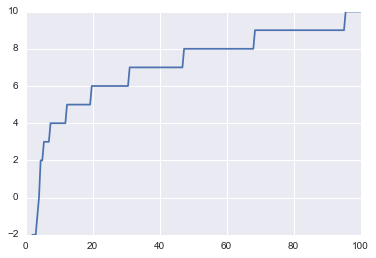

In [97]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(2,100,200), y(np.linspace(2,100,200)))

In [4]:
q1 = ql.Agent('p1')
q2 = ql.Agent('p2')
q3 = ql.Agent('p3')
q4 = ql.Agent('p4')

game = rb.Robbery('test', [0,0,0,0])

In [5]:
from tqdm import tqdm
for i in tqdm(range(10000)):
    game.reset()
    game.play()

  0%|          | 0/10000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [55]:
len(q1.Q.keys())

103

In [124]:
states = q1.Q.keys()
control = []
for state in q1.Q.keys():
    policy = max(q1.Q[state].iterkeys(), key=(lambda key: q1.Q[state][key]))
    control+=[str(policy)]
control = np.array(control)

In [125]:
# from sklearn import svm
# clf = svm.SVC()
# clf.fit(np.array(states), np.array(control))

In [126]:
who_rob = np.zeros(len(control))
who_rob[control=='(1, -1, 0, 0)']=1
who_rob[control=='(1, 0, -1, 0)']=2
who_rob[control=='(1, 0, 0, -1)']=3
# who_rob[who_rob!=1]=0
print who_rob.sum()

0.0


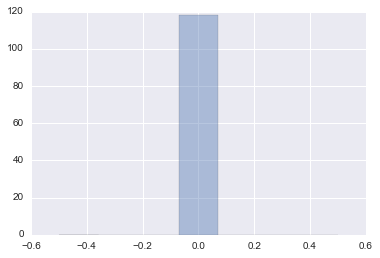

In [127]:
sns.distplot(who_rob, bins=7, kde=False)

In [128]:

lr = LogisticRegression()
lr.fit(states, control)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

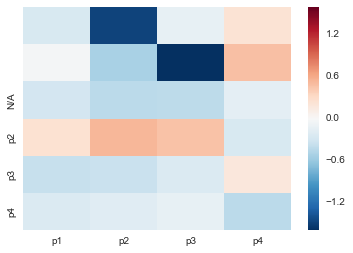

In [129]:

sns.heatmap(lr.coef_, yticklabels=['N/A', 'p2', 'p3', 'p4'], xticklabels=['p1','p2', 'p3', 'p4'])

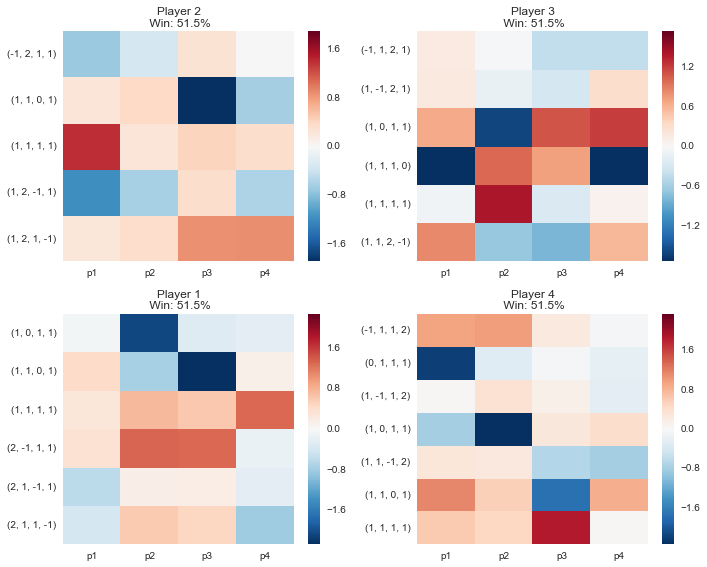

In [130]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,8))

for n,player in enumerate(ql.Agent.get_agents()):
    states = player.Q.keys()
    control = []
    for state in player.Q.keys():
        policy = max(player.Q[state].iterkeys(), key=(lambda key: player.Q[state][key]))
        control+=[str(policy)]
    control = np.array(control)
#     able_to_rob = ['p1', 'p2', 'p3', 'p4']
#     able_to_rob[n] = 'N/A'
    lr = LogisticRegression(class_weight='balanced',
                            multi_class='multinomial',
                            solver='lbfgs')
    lr.fit(states, control)
    
    controls = lr.classes_.tolist()
    sns.heatmap(lr.coef_, ax = ax.flatten()[n],
                yticklabels = controls,
                xticklabels = ['p1','p2', 'p3', 'p4'])
    winpct = 100.*float(player.wins)/player.games_played
    ax.flatten()[n].set_title('Player {0:.0f}\n Win: {1:.1f}%'.format(player.order+1,
                                                                                   winpct))

#     ax.flatten(order='F')[n].set_title('Player'+str(n+1)+'\nWins: {0:.0f}'.format(player.wins))
plt.tight_layout()

In [28]:
lr.classes_


array(['(-1, 0, 1, 0)', '(0, -1, 1, 0)', '(0, 0, 1, -1)'], 
      dtype='|S13')

In [71]:

for i in ql.Agent.get_agents():
    with open(i.str+'_250k_table.txt', 'w') as f:
        pkl.dump(i.Q, f)

In [5]:
for i in ql.Agent.get_agents():
    with open(i.str+'_250k_table.txt', 'rb') as f:
        i.Q = pkl.load(f)

In [29]:
np.array(q1.Q.keys())[who_rob==2]

array([[0, 2, 0, 1],
       [1, 2, 0, 1],
       [0, 0, 2, 1],
       [3, 0, 1, 1],
       [3, 2, 0, 1],
       [1, 0, 1, 0],
       [2, 1, 1, 0],
       [3, 0, 0, 1],
       [3, 0, 0, 2],
       [1, 0, 0, 2],
       [0, 0, 1, 1],
       [3, 1, 0, 2],
       [1, 1, 0, 2],
       [2, 0, 0, 2],
       [0, 0, 2, 0],
       [3, 2, 0, 2],
       [0, 1, 1, 1],
       [3, 1, 0, 1],
       [0, 1, 0, 2],
       [2, 2, 1, 1],
       [1, 0, 1, 1],
       [0, 0, 0, 2],
       [1, 1, 1, 2],
       [2, 0, 2, 1],
       [3, 0, 2, 0],
       [2, 0, 1, 2],
       [1, 0, 2, 1],
       [0, 2, 0, 2],
       [1, 0, 2, 2]])

In [13]:
mask = (np.array((0,0,2,0))!=0) and 
mask[0] = True
mask
# print game.valid_moves(1)
# print game.valid_moves(0)[np.array(mask)]

array([ True, False,  True, False], dtype=bool)

In [131]:
def autolabel(rects, ax):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

def wealth_dist_act(player):
    states = player.Q.keys()
    control = []
    for state in states:
        policy = max(player.Q[state].iterkeys(), key=(lambda key: player.Q[state][key]))
        control+=[str(policy)]
    control = np.array(control)

    who_rob = np.zeros(len(control))
    who_rob[control!='(1, 1, 1, 1)']=1
    who_rob[who_rob!=1]=0
    print who_rob.sum()
    
    ind = np.arange(3)
    width = 0.35
    
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,8))
    for n,i in enumerate(ax.flatten()):
#         sns.distplot(np.array(states)[who_rob==0][:,n], ax=i, label='Peaceful', kde=False)
#         sns.distplot(np.array(states)[who_rob==1][:,n], ax=i, label='Robber', kde=False)
#         sns.jointplot(np.array(states)[who_rob==0][:,n], 
#                       np.array(states)[who_rob==1][:,n],
#                      ax=i, kind='hex' )
        
        allers = np.array(states)[:,n]
        robber = allers[who_rob==1]
        peacer = allers[who_rob==0]
        P_rob = float(robber.size)/allers.size
        print robber.size
        
        all_hist, dex = np.histogram(allers, 3, density=True)
        print all_hist
        rob_hist, dex = np.histogram(robber, 3, density=True)
        pea_hist, dex = np.histogram(peacer, 3, density=True)
        
        P_robGw = rob_hist*P_rob/all_hist
        P_peaGw = pea_hist*(1-P_rob)/all_hist
#         print P_robGw
        rects1 = i.bar(ind, P_robGw, width, 
                       color=sns.xkcd_rgb["denim blue"], 
                       label='Robber')
        rects2 = i.bar(ind + width, P_peaGw, width, 
                       color=sns.xkcd_rgb["medium green"], 
                       label='Peaceful')
#         i.hist([np.array(states)[who_rob==0][:,n],
#                 np.array(states)[who_rob==1][:,n]],
#                10, align = 'right',normed=1, histtype='bar', label=['peaceful', 'robber'])
        i.set_xticks(ind + width)
        i.set_xticklabels(range(11))
#         autolabel(rects1, i)
#         autolabel(rects2, i)
        i.legend(loc=0)
        i.set_title('Player {} Wealth Dist'.format(n+1))
    fig.suptitle('Player {} Action Probability by Player Wealth'.format(player.order+1), size=16)

117.0
117
[ 0.09152542  0.23898305  0.26949153]
117
[ 0.04237288  0.1779661   0.27966102]
117
[ 0.07627119  0.2440678   0.27966102]
117
[ 0.07118644  0.2440678   0.28474576]


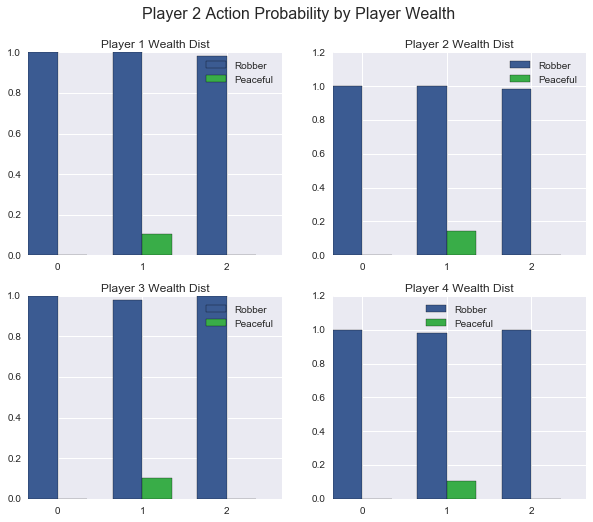

In [132]:
wealth_dist_act(q2)
# plt.bar()


In [133]:
players = []
state_list = []
controls = []
for n,player in enumerate(ql.Agent.get_agents()):
    states = player.Q.keys()
#     print states
    control = []
    for state in player.Q.keys():
        policy = max(player.Q[state].iterkeys(), key=(lambda key: player.Q[state][key]))
        controls+=[str(policy)]
        players+=[player.str]
#         print player.str
        state_list+=[state]
#     control = np.array(control)
    
print len(state_list), len(players), len(controls)
all_dat = pd.DataFrame({"State":state_list, 'Acting_Player':players, "Policy":controls})

472 472 472


In [134]:
all_dat['p1']  = [i[0] for i in all_dat['State']]
all_dat['p2']  = [i[1] for i in all_dat['State']]
all_dat['p3']  = [i[2] for i in all_dat['State']]
all_dat['p4']  = [i[3] for i in all_dat['State']]
all_dat['Robber'] = all_dat['Policy']!='(1, 1, 1, 1)'
all_dat['Leader']=np.argmax(np.array([np.array(i) for i in all_dat.State]), axis=1)
all_dat.Leader = all_dat.Leader.map({0:'p1', 1:'p2', 2:'p3', 3:'p4'})
all_dat.head()

,Acting_Player,Policy,State,p1,p2,p3,p4,Robber,Leader
0,p2,"(1, 2, 1, -1)","(5, 6, 4, 2)",5,6,4,2,True,p2
1,p2,"(1, 2, 1, -1)","(5, 6, 2, 4)",5,6,2,4,True,p2
2,p2,"(1, 2, 1, -1)","(2, 4, 4, 5)",2,4,4,5,True,p4
3,p2,"(1, 2, -1, 1)","(0, 4, 5, 4)",0,4,5,4,True,p3
4,p2,"(1, 2, 1, -1)","(4, 3, 4, 3)",4,3,4,3,True,p1


In [135]:
df_long = pd.melt(all_dat, id_vars=["Acting_Player", "Policy", 'State', 'Robber', 'Leader'],
                   value_vars = ['p1', 'p2', 'p3', 'p4'], 
                   var_name = 'Player', value_name = 'Wealth')
df_long.head()

,Acting_Player,Policy,State,Robber,Leader,Player,Wealth
0,p2,"(1, 2, 1, -1)","(5, 6, 4, 2)",True,p2,p1,5
1,p2,"(1, 2, 1, -1)","(5, 6, 2, 4)",True,p2,p1,5
2,p2,"(1, 2, 1, -1)","(2, 4, 4, 5)",True,p4,p1,2
3,p2,"(1, 2, -1, 1)","(0, 4, 5, 4)",True,p3,p1,0
4,p2,"(1, 2, 1, -1)","(4, 3, 4, 3)",True,p1,p1,4


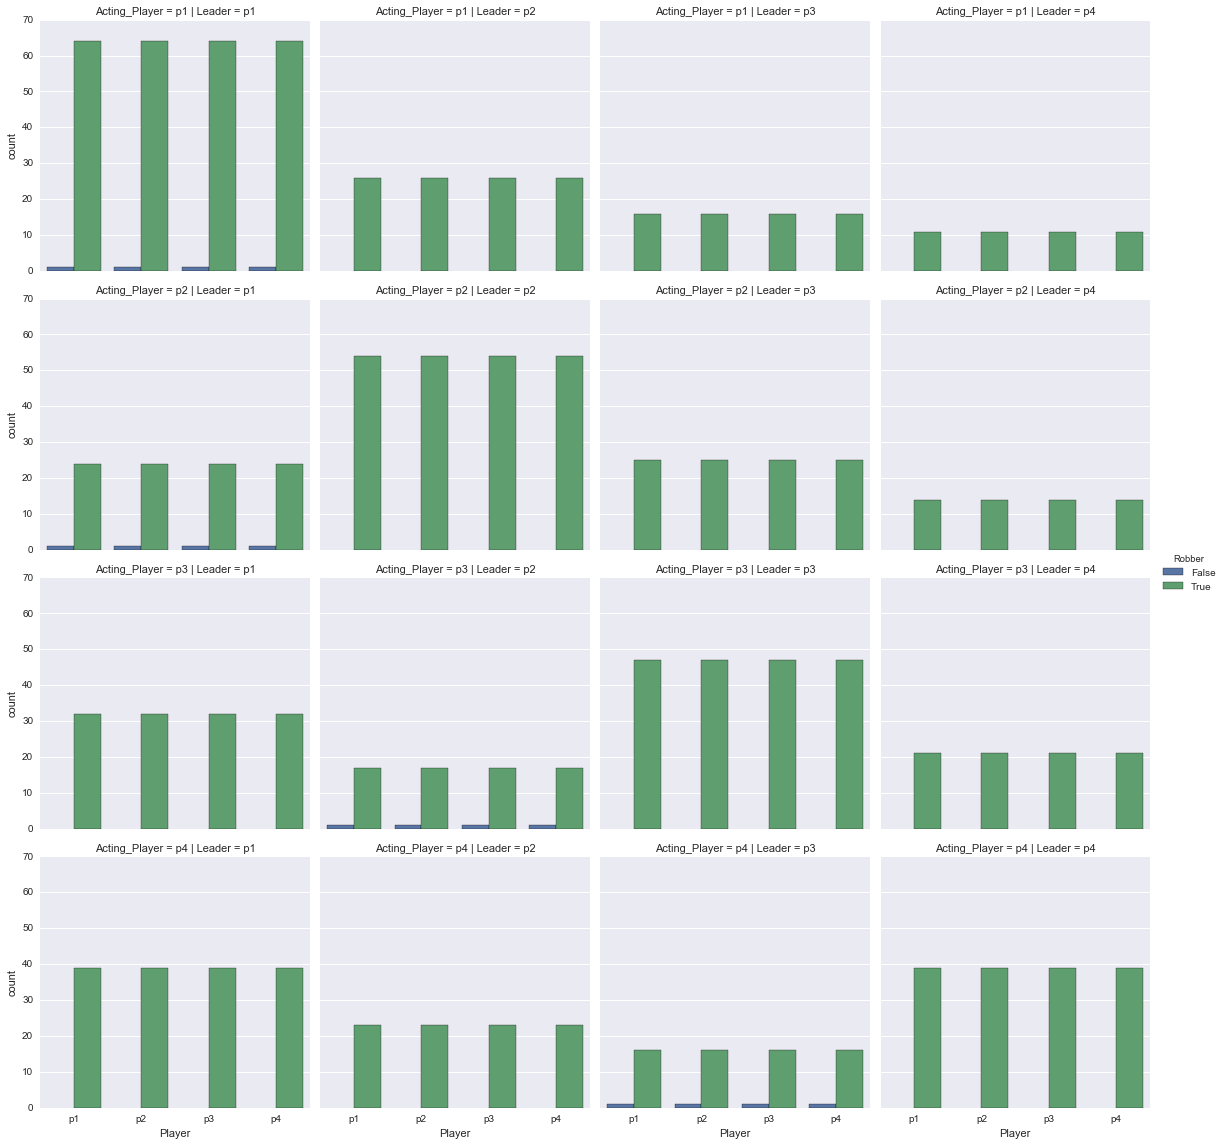

In [136]:
sns.factorplot(x='Player',data=df_long, 
               kind='count', 
               hue='Robber', col='Leader', row='Acting_Player',
               order=['p1','p2','p3','p4'],
               col_order=['p1','p2','p3','p4'],
               row_order=['p1','p2','p3','p4'])

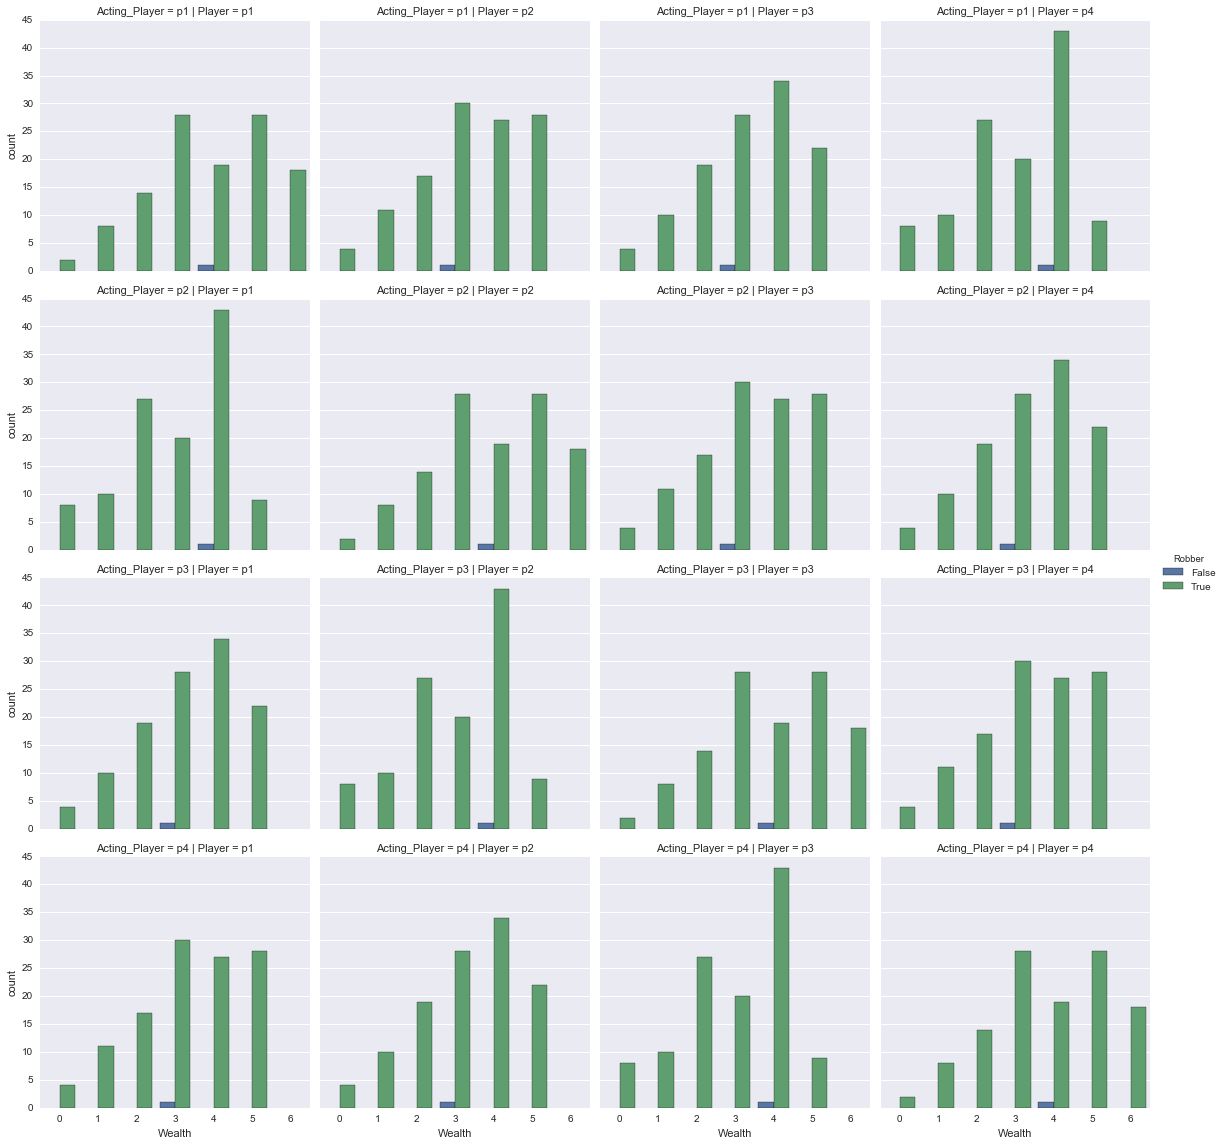

In [137]:
sns.factorplot(x='Wealth',data=df_long, 
               kind='count',
               hue='Robber', col='Player', row='Acting_Player',
              col_order=['p1','p2','p3','p4'],
              row_order=['p1','p2','p3','p4'])

In [38]:
state_peace=np.array([np.array(i) for i in df_long[df_long.Robber==False].State])

In [39]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, init='pca')
proj = model.fit_transform(state_peace)

In [40]:
in_lead=np.argmax(state_peace, axis=1)

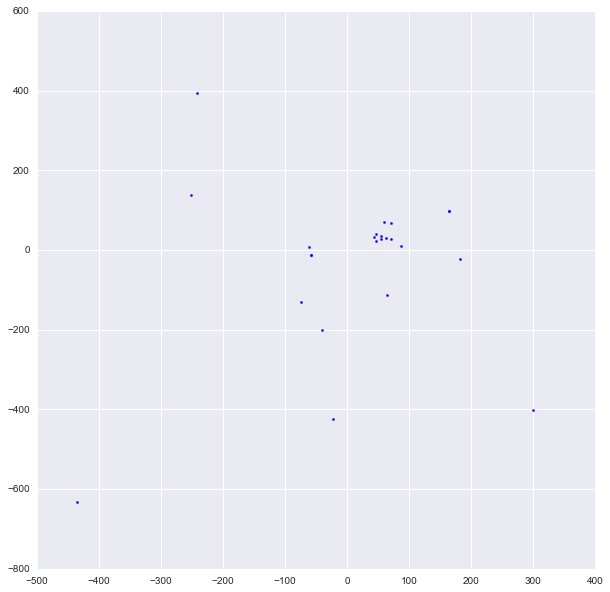

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0][in_lead==0], proj[:,1][in_lead==0], marker='.', color='b')
plt.scatter(proj[:,0][in_lead==1], proj[:,1][in_lead==1], marker='.', color='r')
plt.scatter(proj[:,0][in_lead==2], proj[:,1][in_lead==2], marker='.', color='y')
plt.scatter(proj[:,0][in_lead==3], proj[:,1][in_lead==3], marker='.', color='g')
# plt.scatter(proj[:,0][control!='(0, 0, 0, 0)'], proj[:,1][control!='(0, 0, 0, 0)'], marker='.', color='r')

In [42]:
from sklearn.decomposition import PCA
model = PCA(n_components=2, whiten=True)
proj = model.fit_transform(np.array(states))

/home/tbsexton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a boolean instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


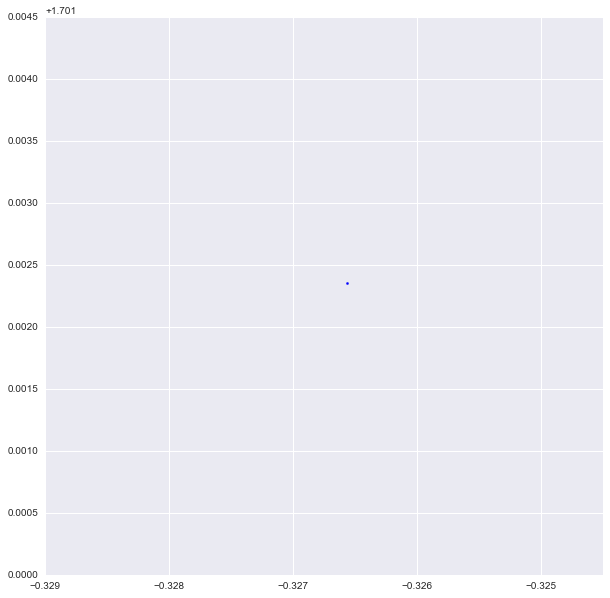

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0][control=='(0, 0, 0, 0)'], proj[:,1][control=='(0, 0, 0, 0)'], marker='.', color='b')
# plt.scatter(proj[:,0][control!='(0, 0, 0, 0)'], proj[:,1][control!='(0, 0, 0, 0)'], marker='.', color='r')

In [23]:
from sklearn.manifold import SpectralEmbedding
model = SpectralEmbedding(n_components=2)
proj = model.fit_transform(np.array(states))

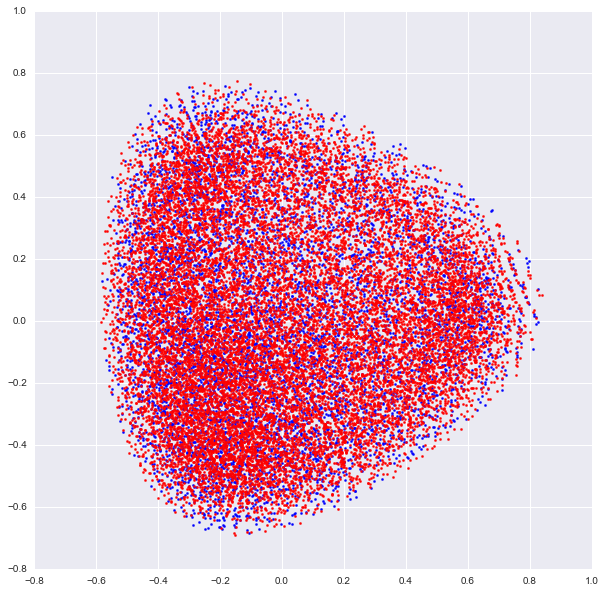

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0][control=='(0, 0, 0, 0)'], proj[:,1][control=='(0, 0, 0, 0)'], marker='.', color='b')
plt.scatter(proj[:,0][control!='(0, 0, 0, 0)'], proj[:,1][control!='(0, 0, 0, 0)'], marker='.', color='r')

In [49]:
X=np.array(states)
st2 = X[:,1]
sop = X[:,[0,2,3]]

mask = np.unique([tuple(sorted(l)) for l in sop], return_index=True)

mask

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 0, 13, 15,  1,  2,  6, 19,  7,  5, 11,  8]))

In [50]:
[tuple(sorted(l)) for l in sop]

[(0, 3, 4),
 (0, 4, 8),
 (5, 7, 10),
 (4, 8, 9),
 (0, 1, 7),
 (2, 3, 7),
 (4, 6, 8),
 (5, 6, 8),
 (0, 5, 9),
 (1, 4, 5),
 (6, 8, 10),
 (2, 4, 9),
 (2, 5, 9),
 (1, 7, 8),
 (3, 4, 8),
 (5, 8, 10),
 (2, 4, 5),
 (1, 7, 7),
 (6, 6, 10),
 (5, 7, 8),
 (1, 6, 8),
 (0, 1, 3),
 (3, 5, 7),
 (6, 6, 9),
 (0, 4, 6),
 (3, 3, 5),
 (3, 6, 7),
 (6, 7, 9),
 (4, 6, 7),
 (5, 6, 7),
 (1, 4, 5),
 (2, 9, 9),
 (4, 4, 5),
 (2, 3, 8),
 (6, 6, 6),
 (2, 5, 7),
 (0, 3, 3),
 (3, 8, 8),
 (1, 1, 6),
 (1, 4, 5),
 (3, 5, 7),
 (5, 6, 8),
 (8, 8, 8),
 (5, 6, 7),
 (4, 5, 6),
 (3, 7, 9),
 (8, 9, 9),
 (8, 9, 10),
 (2, 4, 9),
 (1, 7, 8),
 (5, 5, 7),
 (4, 4, 8),
 (1, 5, 9),
 (6, 7, 8),
 (1, 1, 8),
 (3, 5, 8),
 (2, 6, 8),
 (6, 6, 10),
 (2, 3, 8),
 (1, 1, 7),
 (1, 2, 8),
 (3, 4, 5),
 (1, 4, 5),
 (3, 9, 9),
 (2, 3, 10),
 (1, 9, 10),
 (3, 5, 5),
 (2, 2, 9),
 (0, 2, 4),
 (5, 6, 7),
 (2, 6, 6),
 (5, 7, 10),
 (0, 3, 7),
 (4, 6, 9),
 (7, 7, 8),
 (1, 2, 5),
 (2, 4, 4),
 (7, 8, 10),
 (4, 5, 6),
 (4, 7, 8),
 (1, 6, 9),
 (4, 5, 6),
 (2, 4

In [99]:
sum(np.array([1,3,3,1])==np.array([1,3,3,1]))

4

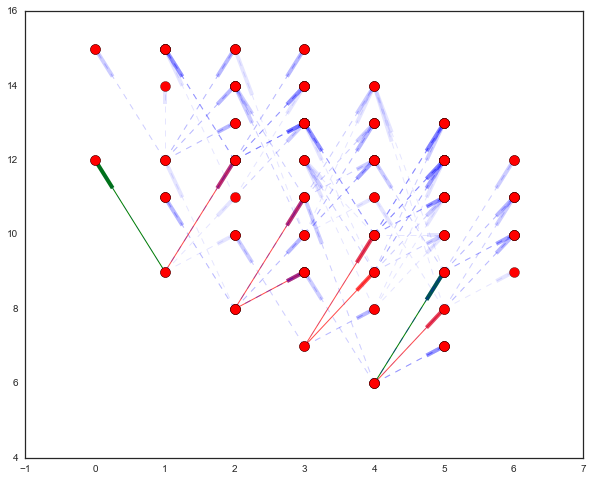

In [157]:
from itertools import combinations, combinations_with_replacement, permutations
import networkx as nx
import pydot, graphviz

brain = q2.Q
player = 0
players = np.roll([0,1,2,3],-1*player).tolist()
G1 = nx.DiGraph()

# G1.add_nodes_from(q1.Q)
G1.add_nodes_from([i for i in permutations(range(6), 4)])
# G1.nodes()
G2 = nx.DiGraph()
for node in G1.nodes_iter():
    try:
        brain[node]
    except KeyError:
        continue
#     print [step_to for step_to in q1.Q[node].keys()]
    for step_to in brain[node].keys():
        G2.add_edge(node,tuple(np.add(node,step_to)), weight= brain[node][step_to])
#     G2.add_edges_from([) for step_to in q1.Q[node].keys()])
for n1,n2 in G2.edges_iter():
    
    G2.node[n1]['pos'] = (n1[players[0]],n1[players[1]]+n1[players[2]]+n1[players[3]])
    G2.node[n2]['pos'] = (n2[players[0]],n2[players[1]]+n2[players[2]]+n1[players[3]])
#     try:
#         G2.edge[(n1,n2)]['weight'] = q1.Q[n1][n2]
#     except KeyError:
#         print 'not in here'
#     nx.draw(G2)
# G2.nodes()
# pos=nx.get_node_attributes(G2,'pos')
# nx.draw(G2, pos)

plt.figure(figsize=(10,8))

elarge=[(u,v) for (u,v,d) in G2.edges(data=True) if d['weight'] > 0.0]
ezero =[(u,v) for (u,v,d) in G2.edges(data=True) if d['weight'] ==0.0]
esmall=[(u,v) for (u,v,d) in G2.edges(data=True) if d['weight'] < 0.0]

pos=nx.get_node_attributes(G2,'pos')
nx.draw_networkx_nodes(G2,pos,node_size=100)
# nx.draw_networkx_labels(G2, pos, font_color='r')

nx.draw_networkx_edges(G2,pos,edgelist=elarge,
                    width=1, edge_color='g')
nx.draw_networkx_edges(G2,pos,edgelist=esmall,
                    width=1,alpha=0.7,edge_color='r')

nx.draw_networkx_edges(G2,pos,edgelist=ezero,
                    width=1,alpha=0.1,edge_color='b',style='dashed')

[((3, 3, 3, 3),
  (4, 4, 5, 2),
  {'color': 'green', 'player': 'p3', 'weight': 14.0}),
 ((3, 3, 3, 3),
  (4, 2, 5, 4),
  {'color': 'green', 'player': 'p3', 'weight': 17.0}),
 ((3, 3, 3, 3),
  (4, 4, 4, 4),
  {'color': 'green', 'player': 'p3', 'weight': 17.0}),
 ((3, 3, 3, 3),
  (2, 4, 5, 4),
  {'color': 'green', 'player': 'p3', 'weight': 12.0}),
 ((4, 3, 3, 1),
  (3, 4, 5, 2),
  {'color': 'green', 'player': 'p3', 'weight': 17.0}),
 ((4, 3, 3, 1),
  (5, 4, 4, 2),
  {'color': 'green', 'player': 'p3', 'weight': 11.0}),
 ((4, 3, 3, 1),
  (5, 4, 5, 0),
  {'color': 'green', 'player': 'p3', 'weight': 11.0}),
 ((4, 3, 3, 1),
  (5, 2, 5, 2),
  {'color': 'green', 'player': 'p3', 'weight': 16.0}),
 ((3, 3, 4, 4),
  (4, 4, 3, 6),
  {'color': 'yellow', 'player': 'p4', 'weight': 4.0}),
 ((3, 3, 4, 4),
  (4, 4, 5, 5),
  {'color': 'yellow', 'player': 'p4', 'weight': 7.0}),
 ((3, 4, 1, 3),
  (4, 5, 2, 4),
  {'color': 'green', 'player': 'p3', 'weight': 12.0}),
 ((3, 4, 1, 3),
  (4, 3, 3, 4),
  {'color':

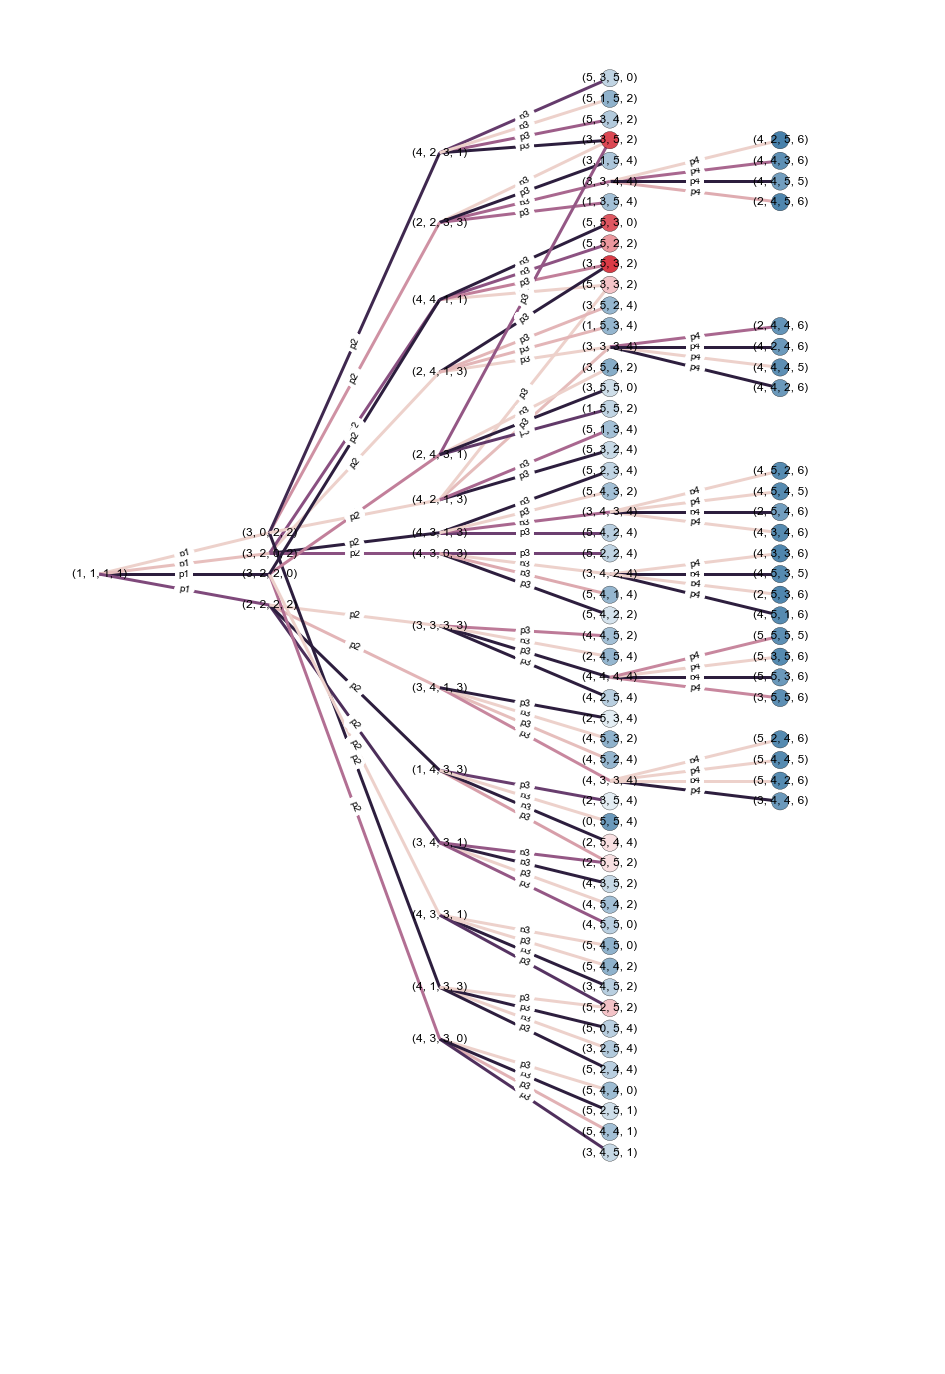

In [160]:
sns.set_style('white')
Act = nx.DiGraph()
Act.graph.setdefault('graph', {})['rankdir'] = 'LR'
colors=['blue','red','green', 'yellow']
def play(game, Act):
    game.reset()
    pl_col = {i[0]:i[1] for i in zip(game.playlist,colors)}

    while not np.any([game.win(i) for i in range(game.num_p)]):
        for i in game.playlist:
            state = game.state
            if np.any([game.win(j) for j in range(game.num_p)]):
                break
            game.take_turn(i)
            moveto = game.state

            if (state, moveto) in Act.edges():
                Act.edge[state][moveto]['weight'] += 1.
            else:
                Act.add_edge(state,moveto, weight = 1., color=pl_col[i], player=i.str)
            
            if np.any([game.win(j) for j in range(game.num_p)]):
                if Act.node[moveto].has_key('visits'):
                    Act.node[moveto]['visits']+=1.
                else: 
                    Act.node[moveto]['visits']=1.
for i in range(1000):
    play(game,Act)

edges,weights = zip(*nx.get_edge_attributes(Act,'weight').items())

from networkx.drawing.nx_agraph import graphviz_layout,write_dot
import matplotlib.colors as col
import matplotlib.cm as cmx

plt.figure(figsize=(16,24))
plt.axis('off')

write_dot(Act,'test.dot')
pos = graphviz_layout(Act, prog='dot',args= '-Nnodesep=100. -Nrankdir=TB')
for i in Act.nodes_iter():
#     edgelist = [e for e in Act.edges(data=True) if e[2]['player']==i.str]
    edgelist = Act.out_edges(i, data=True)
    if len(edgelist)<1:
        continue
    cm = sns.cubehelix_palette(as_cmap=True)
    cNorm  = col.Normalize(vmin=np.min([d['weight'] for (u,v,d) in edgelist]), 
                           vmax=np.max([d['weight'] for (u,v,d) in edgelist]))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    colorList = []
    weights_list = []

    # visits = [i['weight'] for start,stop,i in sorts if i['color']=='red']
    # TODO: scale the edges to a unique max per player. 

    for i in edgelist:
        a, b,d = i
        colorVal = scalarMap.to_rgba(Act.edge[a][b]['weight'])
        colorList.append(colorVal)
        weights_list.append(Act.edge[a][b]['weight'])
    edge_labels = nx.get_edge_attributes(Act,'player')
    nx.draw_networkx_edge_labels(Act,pos, edgelist=edgelist, edge_labels=edge_labels);
    nx.draw_networkx_edges(Act, pos=pos, width=3.,edgelist=edgelist, 
                           edge_color=colorList,arrows=False)

win_nodes=[s for (s,d) in Act.nodes(data=True) if 'visits' in d.keys()]
cm = sns.diverging_palette(240, 10, as_cmap=True)
cNorm  = col.Normalize(vmin=0, vmax=np.max([Act.node[i]['visits'] for i in win_nodes]))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
colorList = []
weights_list = []

for i in win_nodes:
    colorVal = scalarMap.to_rgba(Act.node[i]['visits'])
    colorList.append(colorVal)
    weights_list.append(Act.edge[a][b]['weight'])
nx.draw_networkx_nodes(Act, pos, nodelist=win_nodes, node_color=colorList)
nx.draw_networkx_labels(Act, pos = pos );
'hi'
# [(u,v,d) for (u,v,d) in Act.edges(data=True) if d['weight']>3]